The reason for conducting this assignment using various regression methods, such as Linear Regression, Logistic Regression, Ridge Regression, Lasso Regression, Polynomial Regression, and Bayesian Linear Regression, is to address a real-world problem of predicting the price-per-unit of residential properties. These regression methods offer different approaches to modeling and understanding the relationship between various features (independent variables) and the price-per-unit (dependent variable) of properties.

Here's a summary of the reasons and goals of using these methods:

Linear Regression: Linear regression is a fundamental method for establishing a linear relationship between independent variables and the dependent variable. It helps us understand how changes in the independent variables impact the price-per-unit of properties.

Logistic Regression: Although logistic regression is typically used for classification problems, its inclusion here suggests a need to explore the relationship between categorical independent variables and the likelihood of a binary outcome, which might be relevant in the context of property sales or other binary decisions.

Ridge Regression: Ridge regression is employed when there is multicollinearity among independent variables, which can lead to overfitting. The purpose is to prevent overfitting and make the model more robust to correlated variables. It's a valuable tool to handle complex data relationships.

Lasso Regression: Lasso regression is utilized for feature selection and addressing overfitting. By penalizing less important features and shrinking their coefficients to zero, it helps simplify the model and improve interpretability.

Polynomial Regression: Polynomial regression is employed to model non-linear relationships between independent variables and the price-per-unit. It introduces higher-order terms, allowing the model to capture curved patterns in the data.

Bayesian Linear Regression: Bayesian linear regression combines elements of linear and ridge regression, adding a Bayesian probabilistic framework. It provides a more stable approach to understanding uncertainty in regression coefficients.

The analysis involves fitting these regression models to the data, assessing their performance using various regression metrics (e.g., Mean Squared Error, Root Mean Squared Error, Mean Absolute Error, R2 Score, Explained Variance Score), and choosing the most appropriate model based on the model evaluation results. The primary goal is to build a regression model that can predict the price-per-unit of properties accurately.

Finally, the trained regression model is saved and used to predict the price-per-unit for new real estate transactions, demonstrating the practical application of the model for decision-making in real estate scenarios.

The assignment addresses the complexities of real estate pricing prediction by employing various regression techniques and emphasizes the importance of model evaluation and application in real-world scenarios. It also highlights the trade-offs and suitability of different regression methods based on the specific characteristics of the data and the problem at hand.

In [1]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import seaborn as sns
import pandas as pd
import numpy as np
import os
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/MyDrive/DS05-AS'
filename = 'real_estate.csv'

DS05 = real_estate = pd.read_csv(os.path.join(data_path, filename))

In [4]:
DS05.head(5)

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
DS05.tail(5)

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [7]:
DS05.shape

(414, 7)

In [8]:
DS05.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [9]:
DS05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [10]:
label_column = DS05.select_dtypes(include=['float64']).columns.tolist()
print(label_column)


['transaction_date', 'house_age', 'transit_distance', 'latitude', 'longitude', 'price_per_unit']


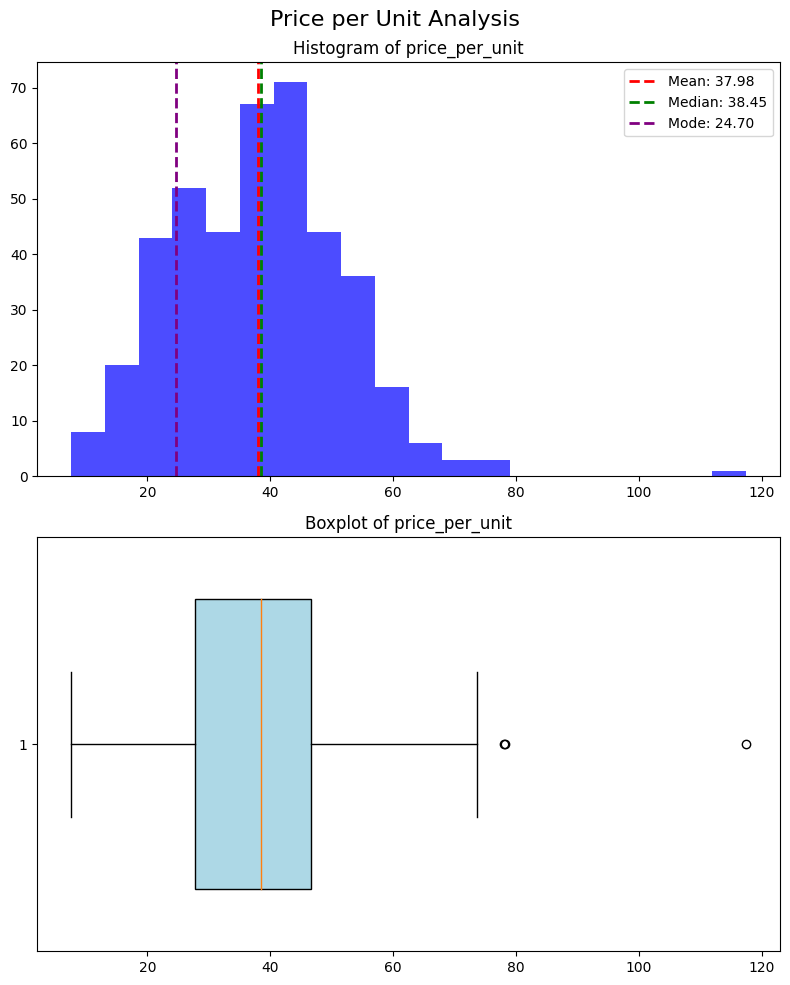

In [11]:
# Assuming your DataFrame is named 'DS05'
y_label = DS05['price_per_unit']

# Create a figure with 2 subplots (2 rows, 1 column)
fig, axes = plt.subplots(2, 1, figsize=(8, 10))  # You can adjust the figsize as needed

# Subplot 1: Histogram
axes[0].hist(y_label, bins=20, color='blue', alpha=0.7)
axes[0].set_title('Histogram of price_per_unit')

# Add lines for the mean, median, and mode
mean = y_label.mean()
median = y_label.median()
mode = y_label.mode().values[0]
axes[0].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
axes[0].axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
axes[0].axvline(mode, color='purple', linestyle='dashed', linewidth=2, label=f'Mode: {mode:.2f}')
axes[0].legend()

# Subplot 2: Boxplot
axes[1].boxplot(y_label, vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='lightblue'))
axes[1].set_title('Boxplot of price_per_unit')

# Add a title to the Figure
fig.suptitle('Price per Unit Analysis', fontsize=16)

# Display the figure
plt.tight_layout()
plt.show()



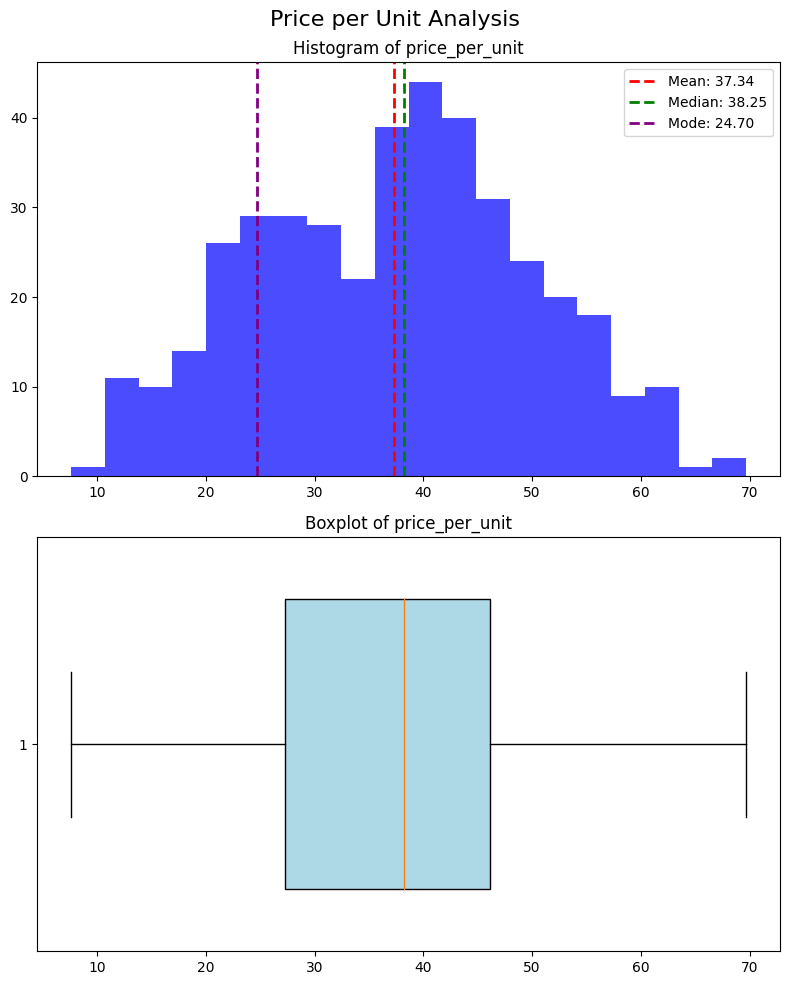

In [12]:
#identify outliers and Remove Outliers

ds= DS05 [DS05['price_per_unit']< 70]

# Get the label column
y_label= ds [ds.columns [-1]]

# Create a figure with 2 subplots (2 rows, 1 column)
fig, axes = plt.subplots(2, 1, figsize=(8, 10))  # You can adjust the figsize as needed

# Subplot 1: Histogram
axes[0].hist(y_label, bins=20, color='blue', alpha=0.7)
axes[0].set_title('Histogram of price_per_unit')

# Add lines for the mean, median, and mode
mean = y_label.mean()
median = y_label.median()
mode = y_label.mode().values[0]
axes[0].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
axes[0].axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
axes[0].axvline(mode, color='purple', linestyle='dashed', linewidth=2, label=f'Mode: {mode:.2f}')
axes[0].legend()

# Subplot 2: Boxplot
axes[1].boxplot(y_label, vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='lightblue'))
axes[1].set_title('Boxplot of price_per_unit')

# Add a title to the Figure
fig.suptitle('Price per Unit Analysis', fontsize=16)

# Display the figure
plt.tight_layout()
plt.show()

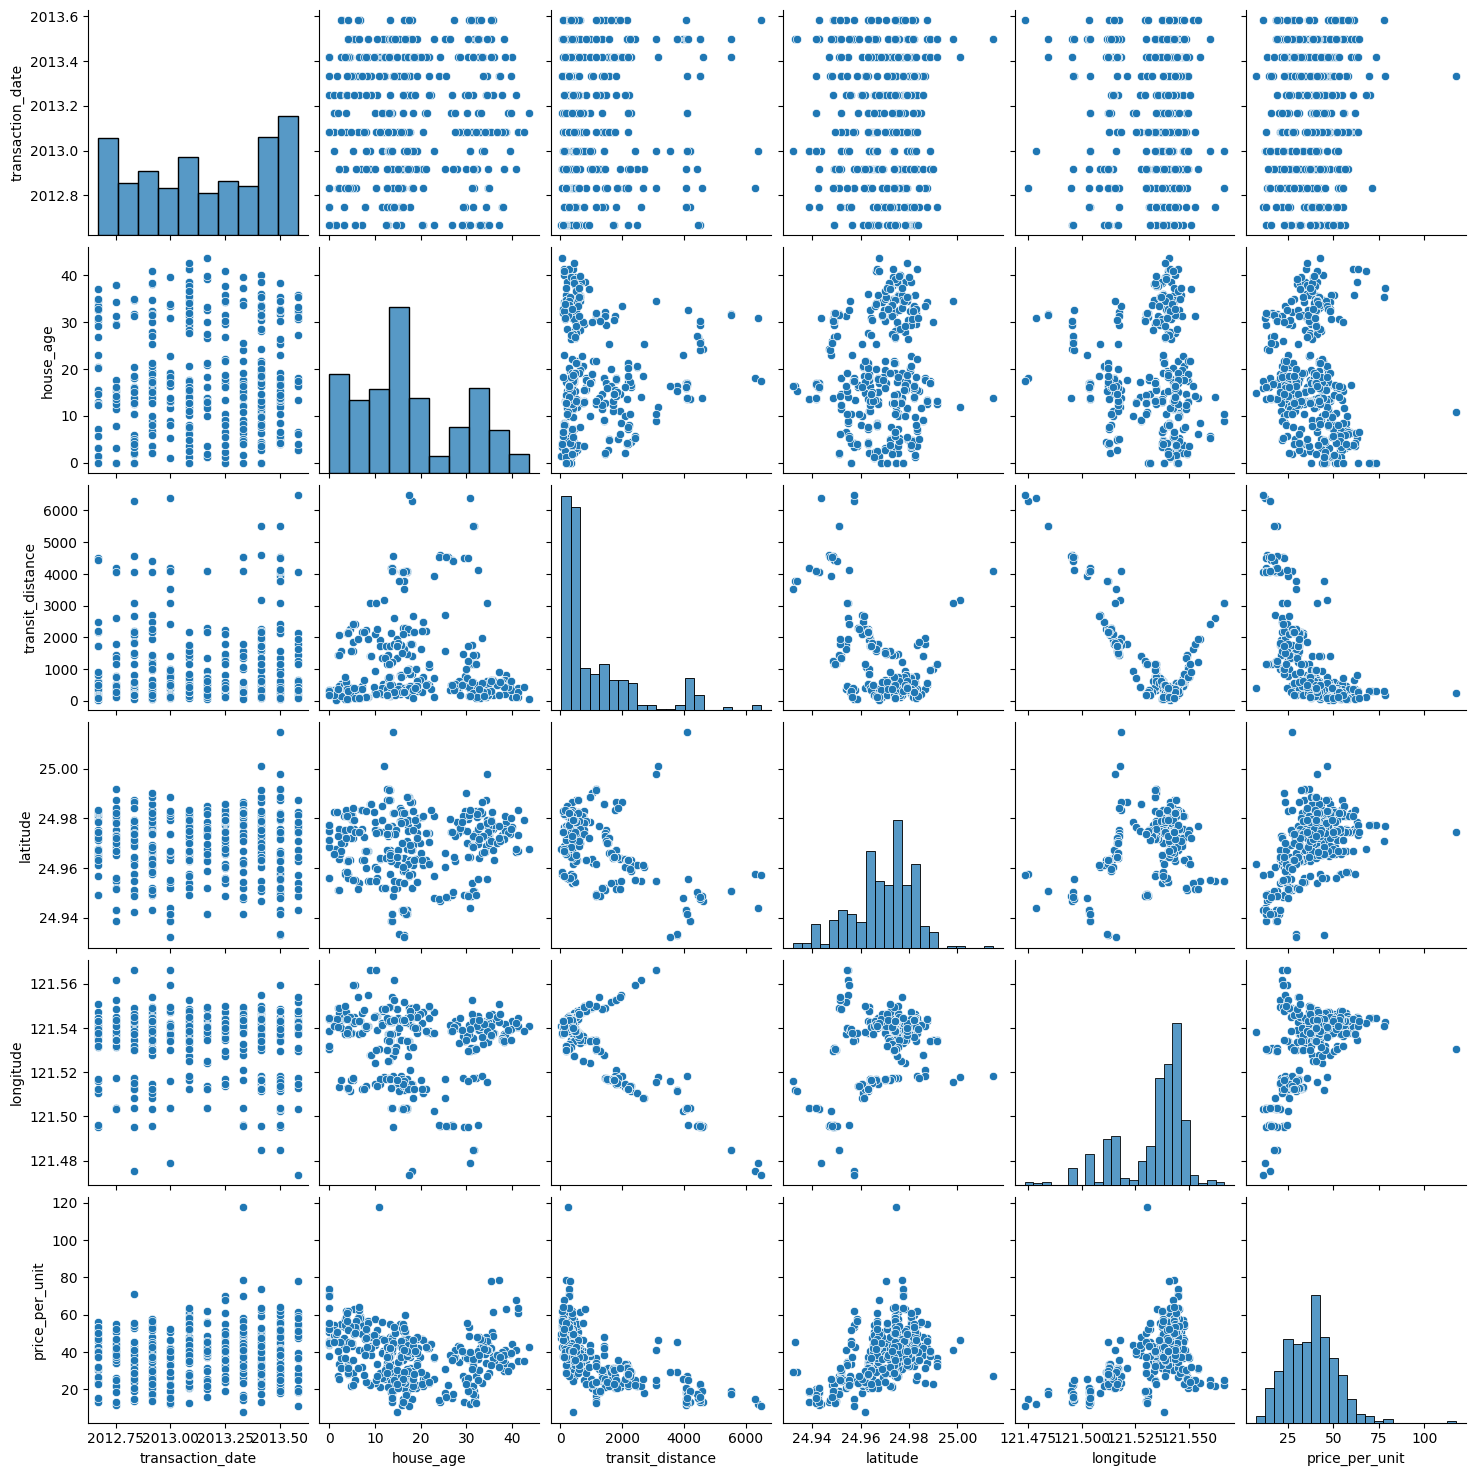

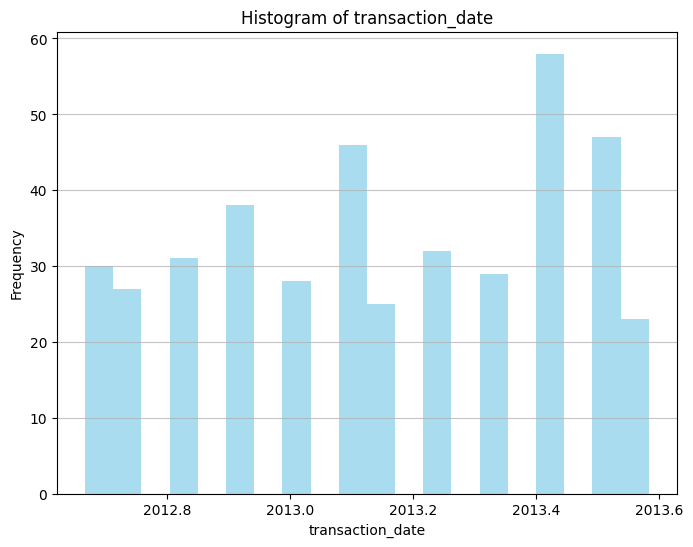

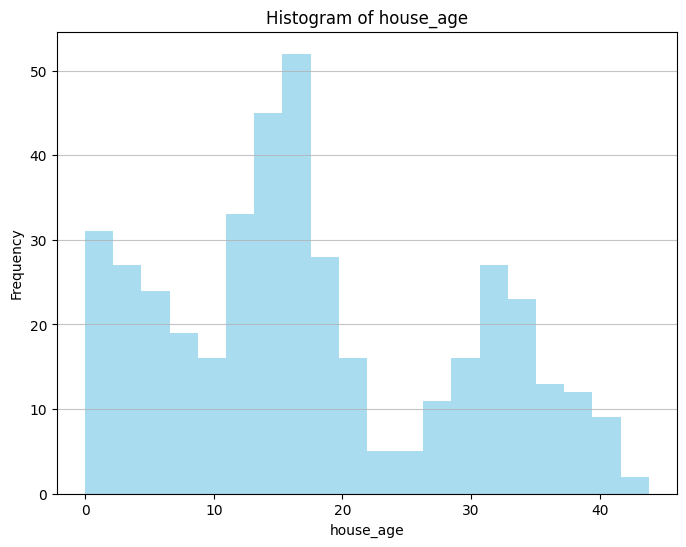

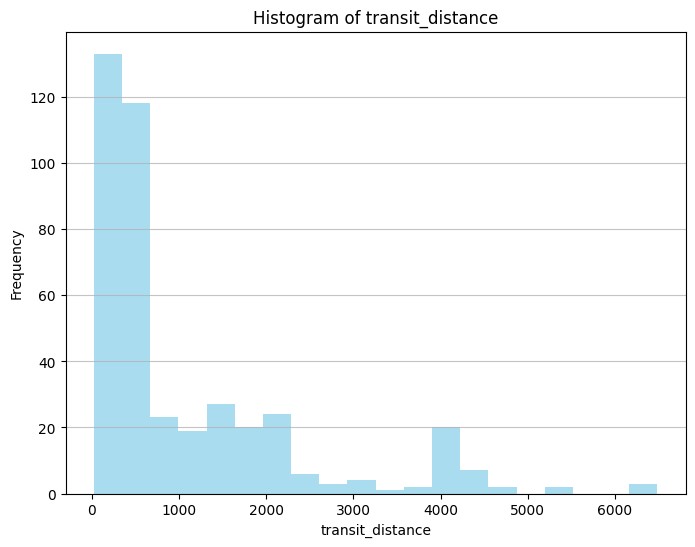

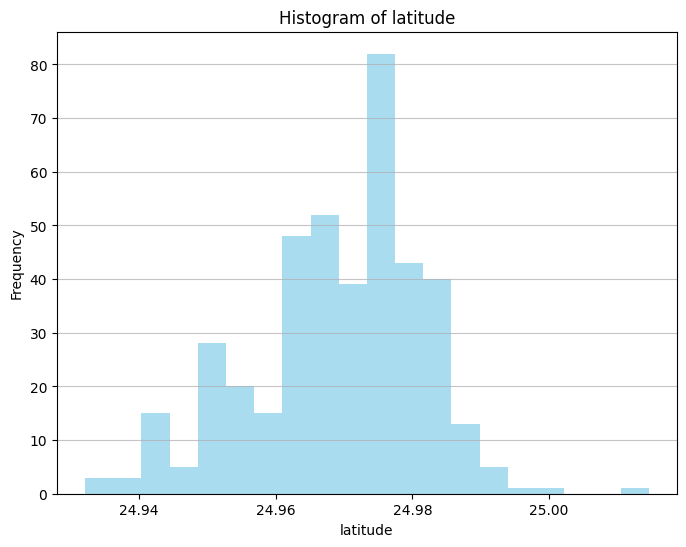

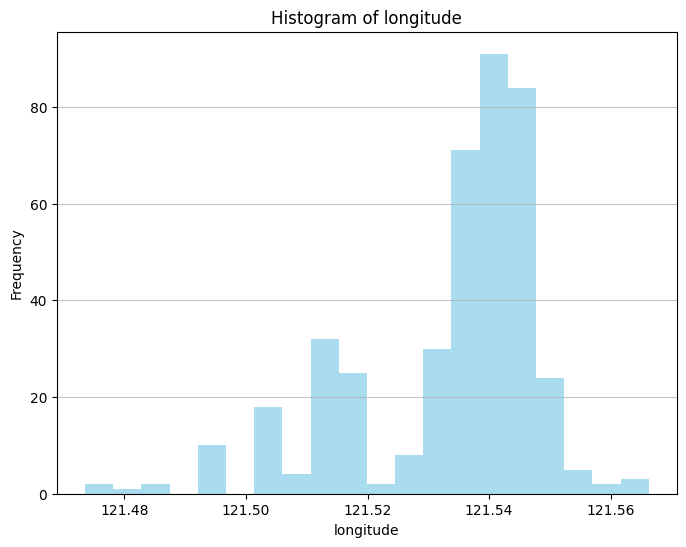

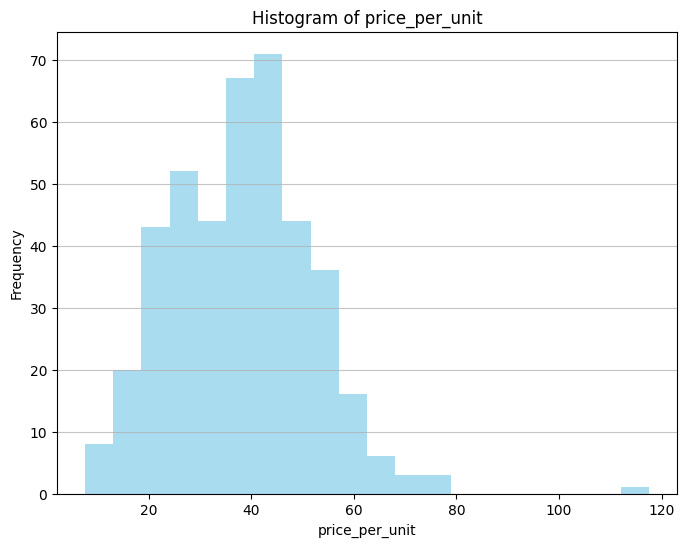

In [13]:
# Select the numerical columns from your DataFrame
numerical_columns = ['transaction_date', 'house_age', 'transit_distance', 'latitude', 'longitude', 'price_per_unit']

# Create a pair plot to visualize relationships between numerical variables
sns.pairplot(DS05[numerical_columns])
plt.show()

# Create histograms for each numerical variable
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(DS05[column], bins=20, color='skyblue', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


In [14]:
# Create a design matrix X with a constant term
X = sm.add_constant(DS05[DS05.columns[:-1]])

# Define the target variable
y = DS05['price_per_unit']

# Create the OLS model and fit it
model = sm.OLS(y, X)
results_fit = model.fit()

# Display the summary of the regression results
print(results_fit.summary())


                            OLS Regression Results                            
Dep. Variable:         price_per_unit   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     94.59
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           4.86e-74
Time:                        09:14:40   Log-Likelihood:                -1487.0
No. Observations:                 414   AIC:                             2988.
Df Residuals:                     407   BIC:                             3016.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Overall, this output provides valuable information about the regression model's performance, the significance of the independent variables, and diagnostic tests for assessing the model's validity.

In [15]:
# Split the dataset into independent variables (X) and the dependent variable (y)
X = DS05[DS05.columns[:-2]].values  # Selecting all columns except the last two
y = DS05[DS05.columns[-1]].values  # Selecting the last column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train, X_test, y_train, y_test

(array([[2.013417e+03, 2.030000e+01, 2.876025e+02, 6.000000e+00,
         2.498042e+01],
        [2.013500e+03, 1.520000e+01, 3.771895e+03, 0.000000e+00,
         2.493363e+01],
        [2.012667e+03, 1.500000e+00, 2.338284e+01, 7.000000e+00,
         2.496772e+01],
        ...,
        [2.013333e+03, 1.080000e+01, 2.525822e+02, 1.000000e+00,
         2.497460e+01],
        [2.012833e+03, 4.600000e+00, 2.596607e+02, 6.000000e+00,
         2.497585e+01],
        [2.013083e+03, 1.100000e+00, 1.935845e+02, 6.000000e+00,
         2.496571e+01]]),
 array([[2.013167e+03, 1.100000e+00, 1.935845e+02, 6.000000e+00,
         2.496571e+01],
        [2.013000e+03, 1.320000e+01, 4.922313e+02, 5.000000e+00,
         2.496515e+01],
        [2.013083e+03, 0.000000e+00, 2.740144e+02, 1.000000e+00,
         2.497480e+01],
        [2.012917e+03, 1.270000e+01, 1.701289e+02, 1.000000e+00,
         2.497371e+01],
        [2.012667e+03, 2.020000e+01, 2.185128e+03, 3.000000e+00,
         2.496322e+01],
      

In [16]:
# Define the numerical variables (columns) to be preprocessed
numerical_variables = [1, 2, 4]  # Replace with the appropriate column indices

# Create a transformer for numerical features (scaling with StandardScaler)
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Combine the preprocessing steps using ColumnTransformer
preprocessing = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_variables)
    ])


In [17]:
# Define the pipeline, including the preprocessing step and the Linear Regression model
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessing),  # Use the preprocessing transformer you defined earlier
    ('regressor', LinearRegression())  # Linear Regression model
])

# Fit the pipeline to the training data
model_lr = pipeline_lr.fit(X_train, y_train)

# Print the trained model
print(model_lr)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [1, 2, 4])])),
                ('regressor', LinearRegression())])


In [18]:
#predictions
predictions_lr = model_lr.predict(X_test)
print(predictions_lr)

[46.10767967 41.4526087  48.53077823 45.92114279 29.47114586 40.55655415
 46.91514439 46.84673278 28.76151949 47.95456722 32.66942832 33.31769527
 40.81269873 28.86347369 37.68802295 33.80396274 39.64823568 43.97794886
 29.28316895 42.2903513  -3.06125233 33.51579565 47.94971528 42.3082801
 12.24573561 45.86978582 13.35775711 48.53077823 37.35383996 40.82683146
 10.27926383 39.13029654 37.24528902 31.13359531 45.52811307 37.91467904
 48.1141943  13.65335101 42.5078466  38.65630878 40.82503458 41.98299125
 44.70604787 43.10941226 41.49821644 46.38261425 41.91038824 25.96371227
 47.58779342 44.4925551  46.10767967 48.78317432 39.7641677  41.05520169
 39.11493581 13.63054715 35.46281004 40.44170225 29.40273425 46.84673278
 32.35368305 34.98454352 13.63054715 10.66894622  3.38680434 33.53859952
 32.26743854 41.17350569 38.54643196 32.88314301 44.04303087 39.06260854
 43.95514499 45.32565138 37.93223164 44.23436963 43.49478332 38.84074416
 41.23128987 34.46482292 42.89300652 46.983556   32.

In [19]:
# Use your trained Linear Regression model to make predictions on the test data
predictions_lr = model_lr.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions_lr)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) score
r2score = r2_score(y_test, predictions_lr)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, predictions_lr)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2score)
print("Explained Variance Score:", explained_variance)



Mean Squared Error (MSE): 82.35762783313447
Root Mean Squared Error (RMSE): 9.075110348262134
R-squared (R2) Score: 0.5075044363889981
Explained Variance Score: 0.5087201344552439


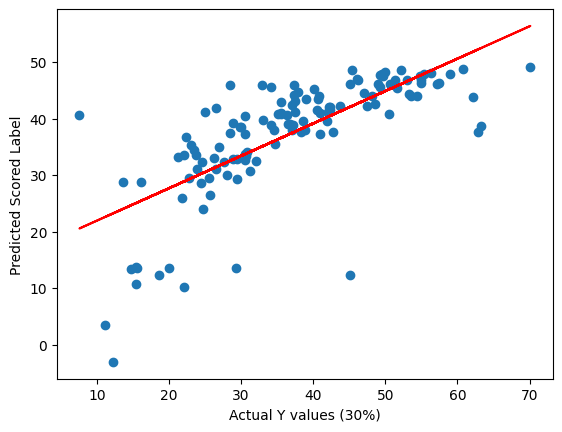

In [20]:
# Create a scatter plot
plt.scatter(y_test, predictions_lr)
plt.xlabel('Actual Y values (30%)')
plt.ylabel('Predicted Scored Label')

# Fit a linear regression line
z = np.polyfit(y_test, predictions_lr, 1)
p = np.poly1d(z)

# Plot the regression line
plt.plot(y_test, p(y_test), color='red')

# Show the plot
plt.show()

In [21]:
# Creating a training pipeline for Ridge Regression
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessing), ('regressor', Ridge())])

# Fitting the Ridge Regression model to the training data
model_rd = ridge_pipeline.fit(X_train, y_train)

# Making predictions using the Ridge Regression model
predictions_rd = model_rd.predict(X_test)
# Print the trained model
print(model_rd)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [1, 2, 4])])),
                ('regressor', Ridge())])


In [22]:
#predictions
predictions_rd = model_rd.predict(X_test)
print(predictions_rd)

[46.07835749 41.43752566 48.50339324 45.90014473 29.49507764 40.55443878
 46.89970589 46.8314981  28.77062801 47.9278734  32.68492081 33.32982539
 40.82229664 28.87279291 37.69808368 33.81477074 39.64539882 43.94644467
 29.3065235  42.27459322 -2.94651863 33.53044866 47.92889906 42.28991884
 12.30329552 45.84916078 13.41505686 48.50339324 37.35109645 40.83108381
 10.35289692 39.13225878 37.24128712 31.13903079 45.51336477 37.91701087
 48.08702491 13.70900845 42.5051911  38.65704194 40.82899515 41.9753869
 44.69749284 43.10273977 41.48299752 46.36211561 41.89803072 25.99131297
 47.55550766 44.48466319 46.07835749 48.76130484 39.76819159 41.04874294
 39.11155803 13.68627252 35.46359812 40.4434767  29.42686985 46.8314981
 32.36882917 35.00186022 13.68627252 10.74190725  3.49578173 33.55318459
 32.26954323 41.16421454 38.55080675 32.88341333 44.02123797 39.06686742
 43.92370874 45.29939537 37.93581438 44.22064868 43.48565672 38.82398078
 41.23502723 34.49629285 42.88806502 46.96791368 32.9

In [23]:
# Use your trained Linear Regression model to make predictions on the test data
predictions_rd = model_rd.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions_rd)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) score
r2score = r2_score(y_test, predictions_rd)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, predictions_rd)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2score)
print("Explained Variance Score:", explained_variance)


Mean Squared Error (MSE): 82.31585755881653
Root Mean Squared Error (RMSE): 9.072808691844909
R-squared (R2) Score: 0.5077542210820939
Explained Variance Score: 0.5089785127543762


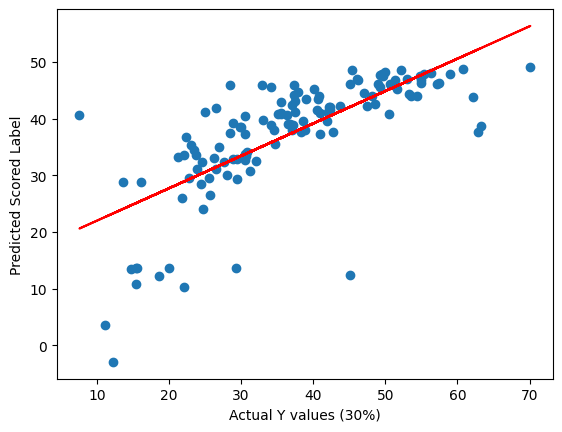

In [24]:
# Create a scatter plot
plt.scatter(y_test, predictions_rd)
plt.xlabel('Actual Y values (30%)')
plt.ylabel('Predicted Scored Label')

# Fit a linear regression line
z = np.polyfit(y_test, predictions_rd, 1)
p = np.poly1d(z)

# Plot the regression line
plt.plot(y_test, p(y_test), color='red')

# Show the plot
plt.show()

In [25]:
# Creating a training pipeline for Ridge Regression
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessing), ('regressor', Lasso())])

# Fitting the Ridge Regression model to the training data
model_ls = ridge_pipeline.fit(X_train, y_train)

# Making predictions using the Ridge Regression model
predictions_rd = model_ls.predict(X_test)
# Print the trained model
print(model_ls)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [1, 2, 4])])),
                ('regressor', Lasso())])


In [26]:
#predictions
predictions_ls = model_ls.predict(X_test)
print(predictions_ls)

[44.51697067 41.08216323 46.35819522 44.87327319 30.57216408 41.22519945
 45.72196631 45.67973257 31.22767272 46.30354991 33.77694214 33.00158108
 39.25905744 31.29097208 38.91334267 34.14605225 40.58030893 43.00167157
 30.24525721 41.91121627  1.9559414  34.0034083  46.03777188 41.90750652
 15.05165751 44.81985006 16.1441606  46.35819522 39.19070027 41.8293376
 13.77011798 38.12551013 38.59932799 32.35546784 44.61018722 39.27850096
 46.40209531 16.27072818 42.70609056 40.17690964 41.46678009 41.81744187
 44.77267933 42.32943177 41.11031906 45.04864693 41.66792817 27.19754914
 45.84127349 44.63764623 44.51697067 46.64373353 40.57409164 41.43581728
 39.93789209 16.25665026 37.22315337 39.76818691 30.52993033 45.67973257
 32.36051104 35.87080601 16.25665026 14.17455704  6.49554388 34.01748621
 33.1645025  41.23677478 39.76279959 33.54460617 43.40091565 40.0348978
 42.98759365 44.24734025 39.37954655 43.60359945 42.5345178  39.65423686
 41.40148174 35.28553271 42.13242726 45.76420005 33.6

In [27]:
# Use your trained Linear Regression model to make predictions on the test data
predictions_ls = model_ls.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions_ls)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) score
r2score = r2_score(y_test, predictions_ls)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, predictions_ls)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2score)
print("Explained Variance Score:", explained_variance)

Mean Squared Error (MSE): 83.37745400567917
Root Mean Squared Error (RMSE): 9.131125560722467
R-squared (R2) Score: 0.5014059136553141
Explained Variance Score: 0.5040018972353442


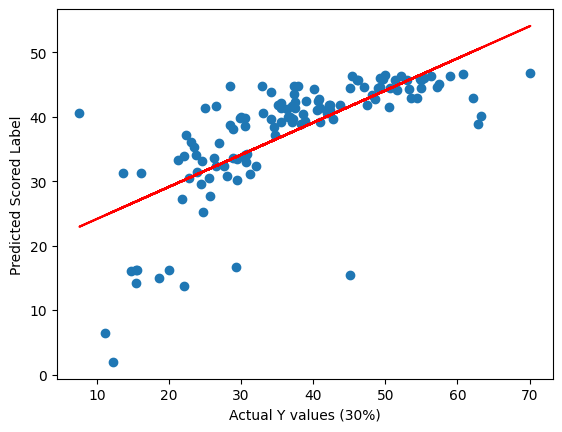

In [28]:
# Create a scatter plot
plt.scatter(y_test, predictions_ls)
plt.xlabel('Actual Y values (30%)')
plt.ylabel('Predicted Scored Label')

# Fit a linear regression line
z = np.polyfit(y_test, predictions_ls, 1)
p = np.poly1d(z)

# Plot the regression line
plt.plot(y_test, p(y_test), color='red')

# Show the plot
plt.show()

In [29]:
# Creating a training pipeline for Ridge Regression
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessing), ('regressor', RandomForestRegressor())])

# Fitting the Ridge Regression model to the training data
model_rf = ridge_pipeline.fit(X_train, y_train)

# Making predictions using the Ridge Regression model
predictions_rf = model_rf.predict(X_test)
# Print the trained model
print(model_rf)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [1, 2, 4])])),
                ('regressor', RandomForestRegressor())])


In [30]:
#predictions
predictions_rf = model_rf.predict(X_test)
print(predictions_rf)

[50.80187619 36.4992     52.9981     35.814      25.495      38.807
 46.2496     50.80796667 14.826      59.606      25.657      30.94533333
 35.28295    15.37       36.185      23.725      41.605      56.431
 24.419      36.24266667 17.367      23.106      50.328      44.084
 16.04326667 34.889      16.289      52.9981     56.492      39.281
 15.466      24.138      37.977      26.44383333 48.9716119  37.603
 53.664      15.1538     37.029      57.831      44.148      43.209
 46.70333333 39.48566667 39.95393333 50.924      35.79688095 23.061
 50.18819048 46.81433333 50.80187619 54.805      41.414      41.573
 39.48766667 15.2838     40.541      25.927      25.31       50.80796667
 25.7805     25.407      15.2838     16.69       18.441      23.141
 26.62241667 38.29566667 36.904      26.43208333 38.525      47.682
 56.431      51.20643333 35.596      40.158      42.178      38.07133333
 42.47       34.221      37.776      48.0556     27.55208333 62.37433333
 24.823      25.9305     38.

In [31]:
# Use your trained Linear Regression model to make predictions on the test data
predictions_rf = model_rf.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions_rf)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) score
r2score = r2_score(y_test, predictions_rf)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, predictions_rf)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2score)
print("Explained Variance Score:", explained_variance)

Mean Squared Error (MSE): 43.652973871519926
Root Mean Squared Error (RMSE): 6.607039720746344
R-squared (R2) Score: 0.7389568333159175
Explained Variance Score: 0.7392566152499784


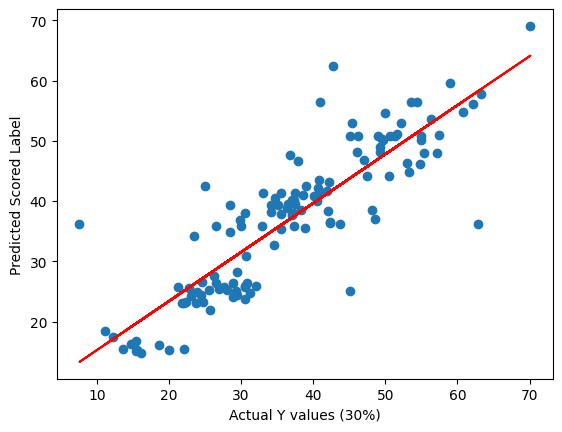

In [32]:
# Create a scatter plot
plt.scatter(y_test, predictions_rf)
plt.xlabel('Actual Y values (30%)')
plt.ylabel('Predicted Scored Label')

# Fit a linear regression line
z = np.polyfit(y_test, predictions_rf, 1)
p = np.poly1d(z)

# Plot the regression line
plt.plot(y_test, p(y_test), color='red')

# Show the plot
plt.show()

In [33]:
random_model = model_rf

In [34]:
import joblib

# Save your trained model
filename = '/content/drive/MyDrive/DS05-AS/randomreuse.pkl'
joblib.dump(random_model, filename)

# Load the trained model
loaded_model = joblib.load(filename)

# Define the data for prediction
X_new = np.array([
    [2013.167, 16.2, 289.3248, 5, 24.98203],
    [2013.000, 13.6, 4082.015, 0, 24.94155]
])

# Use the loaded model to predict the unit price
results = loaded_model.predict(X_new)

# Print the predictions
print('Predictions:')
for prediction in results:
    print(round(prediction, 2))


Predictions:
50.81
15.15


The predictions made by the loaded model on the new data are as follows:

* Prediction for the first data point: 50.81
* Prediction for the second data point: 15.15

These values represent the predicted unit prices based on the features provided in the new data.